## Newton's law of cooling
(This problem is from 'An Introduction to Computer Simulation Methods by Gould and Tobochinik.') <br>
"If we want the coffee to cool as soon as possible, is it better to add the cream immediately after the coffee is made, or should we wait for a whle before we add the cream?"

If I remember it correctly, this was the first assignment in my undergraduate computational physics course, and I absolutely loved it. Here, I use 'Python' to develop a solution since we had to use 'True BASIC' at the time I was taking the course.

----------------------------
If the temperature difference between the water and its surroundings is not too large, the rate of change of the temperature of the water is proportional to this temperature difference. More precisely, in terms of a differential equation,

$$ \frac{\partial{T}}{\partial{t}} = -r(T - T_s) $$

where $T$ is the temperature of the water, $T_s$ is the temperature of its surroundings, $t$ is the time, and $r$ is the "cooling constant." $r$ depends on the heat transfer mechanism, the contact area with the surroundings, and the thermal properties of the water. It carries a dimension of \[time$^{-1}$\].

Simple Euler method is implemented to convert the differential equation to a finite difference equation.
<br>

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def inputs():
    
    t = 0
    dt = 0.001
    TCoffee = 82.3
    TRoom = 17
    
    print("Higher r means faster cooling.")
    print("The desired temperature must be between the initial temperature and the room temperature.")
    print("----------------------------------------------")
    print()
    
    r = float(input('Cooling constant [min^-1]: '))
    TCoffee = float(input('Initial coffee temperature [degrees F]: '))
    TRoom = float(input('Room temperature [degrees F]: '))
    TFinal = float(input('Desired temperature [degrees F]: '))
    
    return t, TCoffee, TRoom, r, dt, TFinal

In [3]:
def Euler(t, TCoffee, TRoom, r, dt):
    
    change = -r*(TCoffee-TRoom)*dt
    TCoffee += change
    t += dt
    
    return t, TCoffee, TRoom, r, dt

In [64]:
def cool():
    
    t, TCoffee, TRoom, r, dt, TFinal = inputs()
    TInitial = TCoffee
    
    tList = [t]
    TCoffeeList = [TCoffee]
    while TCoffee > TFinal:
        
        t, TCoffee, TRoom, r, dt = Euler(t, TCoffee, TRoom, r, dt)
        tList.append(t)
        TCoffeeList.append(TCoffee)

    fig0 = plt.figure(figsize=(8,6))
    ax0 = fig0.add_subplot(111)
    ax0.grid(True)

    ax0.plot(tList, TCoffeeList)
    fig0.suptitle('It takes ' + str('{:.1f}'.format(t)) + ' mins to cool down the coffee from ' + str(TInitial) + ' F to ' + str('{:.1f}'.format(TCoffee))+' F', size=13)    
    ax0.set_ylabel('Temperature [degrees F]', size=11) 
    ax0.set_xlabel('Time [mins]', size=11) 
    
    return

Higher r means faster cooling.
The desired temperature must be between the initial temperature and the room temperature.
----------------------------------------------

Cooling constant [min^-1]: 0.01
Initial coffee temperature [degrees F]: 100
Room temperature [degrees F]: 55
Desired temperature [degrees F]: 57


<IPython.core.display.Javascript object>


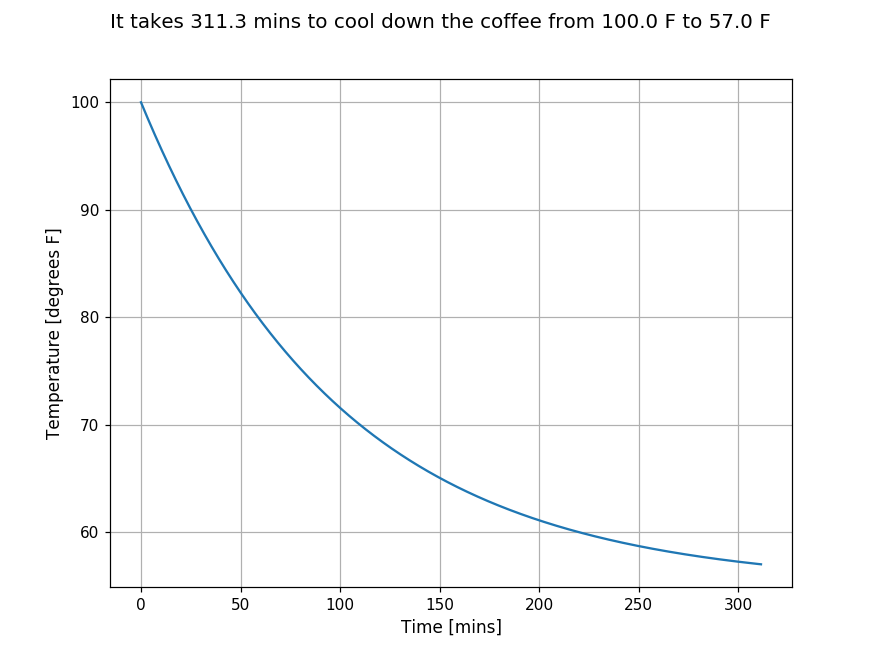

In [65]:
#################
cool()

----------------------------
## Is it faster to add cream first or later?
Suppose that the initial temperature of the coffee is $90^{\circ}C$, but that the coffee can be sipped comfortably only when its temperature is below $75^{\circ}C$. Assume that the addition of cream cools the coffee by $5^{\circ}C$. If we are in a hurry and want to wait the shortest possible time, should the cream be added first and the coffee be allowed to cool, or should we wait until the coffee has cooled to $80^{\circ}C$ before adding the cream?

In [91]:
def parameters():
    
    t = 0
    dt = 0.001
    r = 0.02
    TCoffee = 90
    TRoom = 67
    TFinal = 75
    TCream = 5
    
    return t, dt, r, TCoffee, TRoom, TFinal, TCream    

In [92]:
def creamFirst():
    
    t, dt, r, TCoffee, TRoom, TFinal, TCream = parameters()
    TInitial = TCoffee
    
    tList = [t]
    TCoffeeList = [TCoffee]
    TCoffee -= TCream   # pour cream first
    TCoffeeList.append(TCoffee)
    tList.append(t)
    while TCoffee > TFinal:
        
        t, TCoffee, TRoom, r, dt = Euler(t, TCoffee, TRoom, r, dt)
        tList.append(t)
        TCoffeeList.append(TCoffee)        
        
    fig1 = plt.figure(figsize=(8,6))
    ax1 = fig1.add_subplot(111)
    ax1.set_ylim(TFinal, TInitial)
    ax1.grid(True)

    ax1.plot(tList, TCoffeeList)
    fig1.suptitle('(cream first case) It takes ' + str('{:.1f}'.format(t)) + ' mins to cool down the coffee to ' + str('{:.1f}'.format(TCoffee))+' F', size=13)    
    ax1.set_ylabel('Temperature [degrees F]', size=11) 
    ax1.set_xlabel('Time [mins]', size=11) 
    
    return

In [93]:
def creamLater():
    
    t, dt, r, TCoffee, TRoom, TFinal, TCream = parameters()
    TInitial = TCoffee
    Tlater = TFinal + TCream   # at which the cream is dropped
    
    tList = [t]
    TCoffeeList = [TCoffee]
    while TCoffee > TFinal:
        
        t, TCoffee, TRoom, r, dt = Euler(t, TCoffee, TRoom, r, dt)
        tList.append(t)
        TCoffeeList.append(TCoffee)
        if (TCoffeeList[-2] > Tlater) and (TCoffeeList[-1] < Tlater):
            TCoffee -= TCream
            TCoffeeList[-1] = TCoffee
        
    fig2 = plt.figure(figsize=(8,6))
    ax2 = fig2.add_subplot(111)
    ax2.set_ylim(TFinal, TInitial)
    ax2.grid(True)

    ax2.plot(tList, TCoffeeList)
    fig2.suptitle('(cream later case) It takes ' + str('{:.1f}'.format(t)) + ' mins to cool down the coffee to ' + str('{:.1f}'.format(TCoffee))+' F', size=13)    
    ax2.set_ylabel('Temperature [degrees F]', size=11) 
    ax2.set_xlabel('Time [mins]', size=11) 
    
    return

<IPython.core.display.Javascript object>


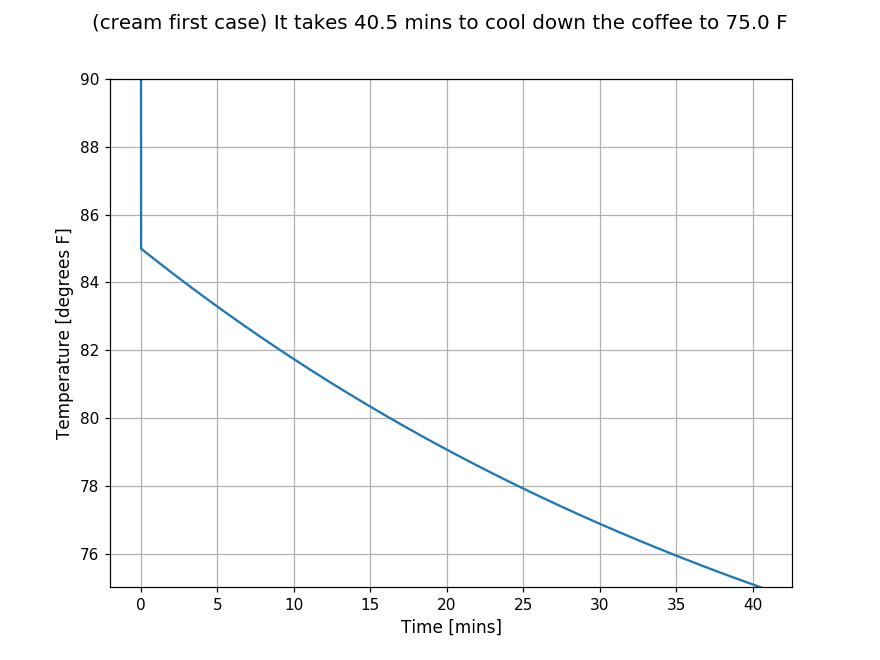

In [94]:
creamFirst()

<IPython.core.display.Javascript object>


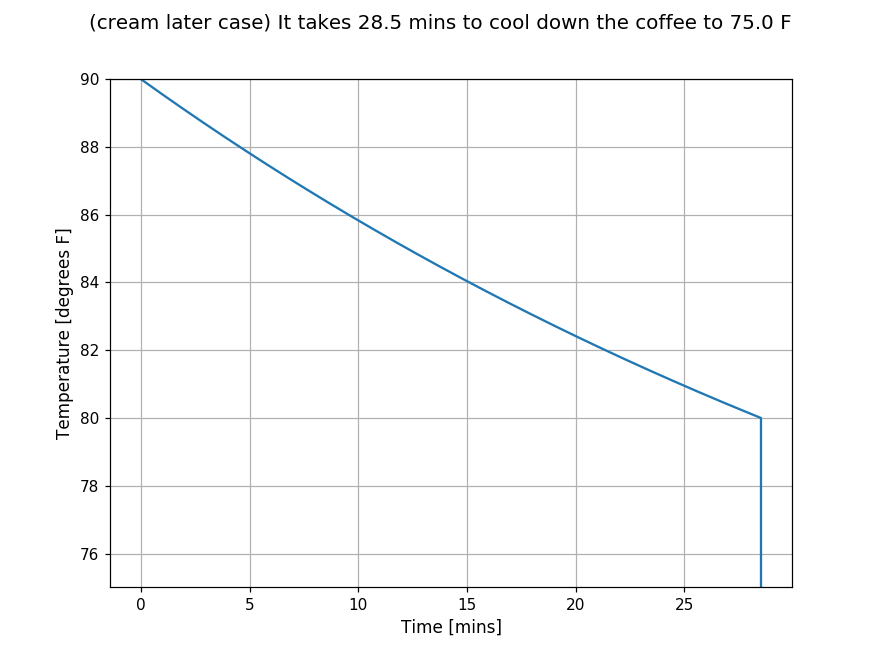

In [95]:
creamLater()

------------------
## In fact, it is best to wait as long as you can, then add cream because the cooling rate depends on the difference between the coffee temperature and the room temperature!